CF 6.4 FINAL PROJECT PART 3

# OUTLINE

    1. Import libraries and data
    2. Hypothesis
    3. Data check
    4. Data prep for regression analysis 
    5. Regression analysis
    6. Summary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# creating the file path
path = r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\chocolate_bar_ratings_cleaned5.csv'

In [4]:
# importing the file that was from 6.4 part 2 
choc_bar_ratings_df_clean5= pd.read_csv(r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\choc_bar_ratings_df_clean5.csv')

2. HYPOTHESIS
This is going back over a previous hypothesis.
Chocolate bars with the highest rating have a Middle Level amount of cocoa in them.
("<0.6: "Low percent")
(>= 0.6 and < 0.75: "Mid percent),
(>=0.75 and <1: "High percent"),
(1= "Completely Cocoa")

3. CHECKING THE DATA
2. Data check
This is the same data frame used in part 1 and part 2 of 6.4

In [5]:
# assessing the data frame
choc_bar_ratings_df_clean5.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Num_of_Ingredients,Specific Ingredients,Cocoa Level,Ingredient Level,Rating Level
0,Manoa,U.S.A.,2012.0,Liberia,"Liberia, batch 174",0.76,"molassses, intense, off, herb",3.25,3,"B,S,C",0,3,Mid-level
1,Manoa,U.S.A.,2012.0,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.76,"oily, tangy, fruit, earthy",2.75,3,"B,S,C",0,3,Mid-level
2,Manoa,U.S.A.,2012.0,Peru,"Piura, batch 173",0.76,"banana, menthol, medicinal",3.00,3,"B,S,C",0,3,Mid-level
3,Manoa,U.S.A.,2012.0,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.68,"molasses, sweet, cocoa",3.25,3,"B,S,C",0,3,Mid-level
4,Nanea,U.S.A.,2013.0,U.S.A.,Criollo Blend,0.72,"sandy, spicy, earthy",3.50,0,NaN,0,0,Mid-level


In [6]:
# ***Note: 
# switching the nan values so that they are a '0' in the for the Rating column
# might be able to simply delete all of this as long as the '0' values stay in the Rating column
 # choc_bar_ratings_df_clean4['Rating'].fillna(0).astype(int) 

This code here is double checking for any extreme values in the cocoa percent

C:\Users\rdpor\AppData\Local\Temp\ipykernel_20948\565312205.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(choc_bar_ratings_df_clean5['Cocoa Percent'], bins=25)


<Axes: xlabel='Cocoa Percent', ylabel='Density'>

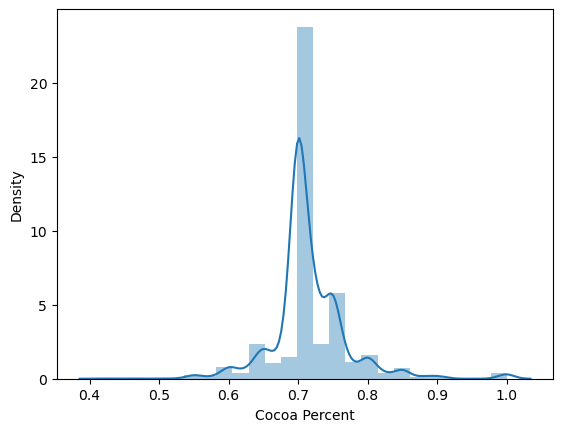

In [7]:
sns.distplot(choc_bar_ratings_df_clean5['Cocoa Percent'], bins=25)

In [8]:
# most chocolate bars are made with 3 ingredients

In [9]:
# Creating how to see  mode values of 'Cocoa Percent'
# Custom function to calculate the mode
def mode(group): return group.mode().iloc[0]  

In [10]:
# summary stats
choc_bar_ratings_df_clean5['Cocoa Percent'].agg(['mean','min', 'median', 'max',mode])

mean      0.716131
min       0.420000
median    0.700000
max       1.000000
mode      0.700000
Name: Cocoa Percent, dtype: float64

4.  This is the Data preperation for the regression analysis

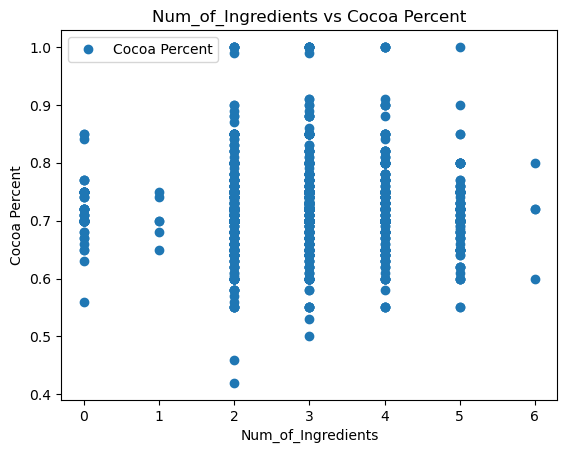

In [11]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Trying to understand how the cocoa level (independent variable) relates to the rating (dependent variable)
choc_bar_ratings_df_clean5.plot(x = 'Num_of_Ingredients', y='Cocoa Percent',style='o') 
plt.title('Num_of_Ingredients vs Cocoa Percent')  
plt.xlabel('Num_of_Ingredients')  
plt.ylabel('Cocoa Percent')
plt.show()

In [12]:
# what this code is doing is reshaping the variables into NumPy arrays and put them into separate objects.

X = choc_bar_ratings_df_clean5['Num_of_Ingredients'].values.reshape(-1,1)
y = choc_bar_ratings_df_clean5['Cocoa Percent'].values.reshape(-1,1)

In [13]:
# checking the y values
y

array([[0.76],
       [0.76],
       [0.76],
       ...,
       [0.75],
       [0.7 ],
       [0.72]])

In [14]:
# checking the X values
X

array([[3],
       [3],
       [3],
       ...,
       [2],
       [2],
       [0]], dtype=int64)

In [15]:
# What this code is doing is splitting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

5. ACTUAL REGRESSION ANALYSIS

In [16]:
# What this code is doing is creating a regression object, also, it will be fit onto the training set.

regression = LinearRegression() 

In [17]:
# What this code is doing is fitting the regression object onto the training set. # flin 15

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# What this code is doing is predicting the values of y using X.

y_predicted = regression.predict(X_test)

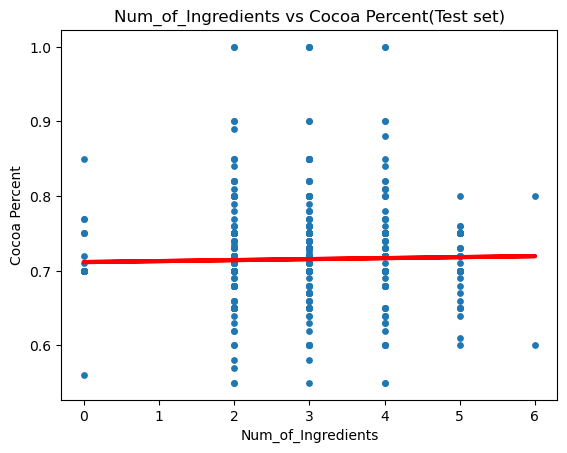

In [19]:
# What this code is doing is creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Num_of_Ingredients vs Cocoa Percent(Test set)')
plot_test.xlabel('Num_of_Ingredients')
plot_test.ylabel('Cocoa Percent')
plot_test.show()

In [53]:
# What this code is doing is creating objects that contain the model summary statistics.
# this is the mean squared error
# this is the R2 score.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [52]:
# Print the model summary statistics. 
# Evaluating the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00132943]]
Mean squared error:  0.003042013966366335
R2 score:  0.0006345380921705113


This does multiple things.  The positive slope means various things.  One of the things the positive slope means is that there's a positive relationship.  When the (x)'Num_of_Ingredients' rises, the (y) 'cocoa percent' barely increases.  
the MSE is not to large of a number, it's 0.003 to be more exact. Note: I'm open to feedback on this model

In [51]:
y_predicted

array([[0.71562919],
       [0.71695862],
       [0.71562919],
       [0.71562919],
       [0.71562919],
       [0.71562919],
       [0.71562919],
       [0.71429977],
       [0.71562919],
       [0.71695862],
       [0.71562919],
       [0.71828805],
       [0.71429977],
       [0.71429977],
       [0.71562919],
       [0.71429977],
       [0.71695862],
       [0.71429977],
       [0.71562919],
       [0.71695862],
       [0.71562919],
       [0.71828805],
       [0.71562919],
       [0.71429977],
       [0.71429977],
       [0.71828805],
       [0.71695862],
       [0.71562919],
       [0.71562919],
       [0.71695862],
       [0.71695862],
       [0.71562919],
       [0.71562919],
       [0.71164092],
       [0.71562919],
       [0.71562919],
       [0.71562919],
       [0.71562919],
       [0.71562919],
       [0.71562919],
       [0.71429977],
       [0.71562919],
       [0.71164092],
       [0.71562919],
       [0.71562919],
       [0.71164092],
       [0.71695862],
       [0.716

In [50]:
regression_data_df3

,Actual,Predicted
0,0.70,0.715629
1,0.70,0.716959
2,0.55,0.715629
3,0.70,0.715629
4,0.70,0.715629
...,...,...
793,0.72,0.715629
794,0.70,0.711641
795,0.75,0.715629
796,0.70,0.715629


In [49]:
# Create a dataframe comparing the actual and predicted values of y.

regression_data_df3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted,Discrepancy
0,0.700,0.718288,0.018288
1,0.700,0.714300,0.014300
2,0.700,0.715629,0.015629
3,0.700,0.715629,0.015629
4,0.700,0.714300,0.014300
5,0.740,0.715629,0.024371
6,0.730,0.715629,0.014371
7,0.720,0.715629,0.004371
8,0.725,0.714300,0.010700
9,0.720,0.716959,0.003041


By doing a quick glance at the data one can see that the values are pretty close 
the values are sometimes only .01 apart from each other, however, there are times 
when the values are futher apart like .05 apart. 

In [48]:
# This code is finding out how many predictions were off by a determined threshold amount.
# I chose 0.05 because that seems to be a re-occurring difference above.

# This code is defining a threshold for correctness 
threshold = 0.05

# This code is calculating the absolute discrepancy between Actual and Predicted
data['Discrepancy'] = abs(data['Actual'] - data['Predicted'])

# This code is counting the number of predictions that are not correct by the defined threshold
incorrect_predictions = data[data['Discrepancy'] > threshold]
num_incorrect_predictions = len(incorrect_predictions)

print(f"Number of predictions not correct by more than {threshold}: {num_incorrect_predictions}")

Number of predictions not correct by more than 0.05: 400


In [ ]:
choc_bar_ratings_df_clean5.shape

It's possible that this model will work. There are some parts of the dataset that aren't correct by more than 0.03.  It is possible that this model is acceptable.  

This part is comparing how the regression will fit the training set. 

In [31]:
# Predicting the X_train

y_predicted_train = regression.predict(X_train)


In [32]:
# In simpler terms, these metrics help one understand
# how accurate and explanatory the predictive model is.
# we want low RMSE and high R2 for a well-performing model in the most ideal situation.

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
# What these print statements are doing is providing insights into the model's coefficients and its predictive performance.


print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00132943]]
Mean squared error:  0.003042013966366335
R2 score:  0.0006345380921705113


The Slope: stayed the same at 0.0013
The Mean Squared Error (RMSE) stayed the same at 0.003108
The R2 score increased from -0.0025 to 0.0006


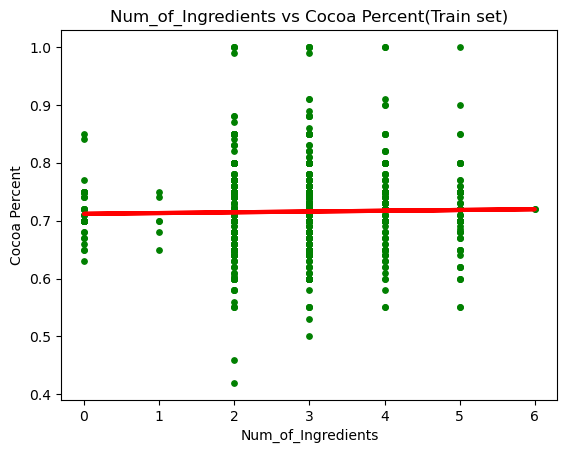

In [34]:
# What this code is doing is creating a scatterplot the training set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Num_of_Ingredients vs Cocoa Percent(Train set)')
plot_test.xlabel('Num_of_Ingredients')
plot_test.ylabel('Cocoa Percent')
plot_test.show()

In [35]:
# # ***Note: maybe delete this Ramon
data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(30)

,Actual,Predicted
0,0.700,0.718288
1,0.700,0.714300
2,0.700,0.715629
3,0.700,0.715629
4,0.700,0.714300
5,0.740,0.715629
6,0.730,0.715629
7,0.720,0.715629
8,0.725,0.714300
9,0.720,0.716959


In [37]:
# Create a dataframe comparing the actual and predicted values of y.

regression_data_df3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.700,0.718288
1,0.700,0.714300
2,0.700,0.715629
3,0.700,0.715629
4,0.700,0.714300
5,0.740,0.715629
6,0.730,0.715629
7,0.720,0.715629
8,0.725,0.714300
9,0.720,0.716959


Going throught and inspecting this, we can see various things.  First off, the predictions 
seem to be very close.  There are of course a multitude of values. There are many that are .01 to .05 close to one 
another.  Some however are further apart by 0.1.  Most of this is dipicted in the discrepency column. 

In [39]:
# What this is doing is finding how many predictions were off by a determined threshold amount.
# I chose 0.03 because that seems to be a re-occurring difference above.

# This is defining a threshold for correctness 
threshold = 0.03

# This is calculating the absolute discrepancy between Actual and Predicted
data['Discrepancy'] = abs(data['Actual'] - data['Predicted'])

# This code is counting the number of predictions that are not correct by the defined threshold
incorrect_predictions = data[data['Discrepancy'] > threshold]
num_incorrect_predictions = len(incorrect_predictions)

print(f"Number of predictions not correct by more than {threshold}: {num_incorrect_predictions}")

Number of predictions not correct by more than 0.03: 725


In [40]:
choc_bar_ratings_df_clean5.shape

(2657, 13)

A little more than 10% of the preditions for the dataset are incorrect by more than 0.03. 90% close to accuracy can be considered a pretty good margin. Perhaps this model is acceptable.
Comparing how the regression fits the training se

In [41]:
# Predicting the X_train

y_predicted_train = regression.predict(X_train)

In [42]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00132943]]
Mean squared error:  0.003042013966366335
R2 score:  0.0006345380921705113


 ***Note: Slope has not changed. It's still at 0.0013
RMSE has not changed.  It's still at 0.0031
R2 has not changed.  It's still -0.0025




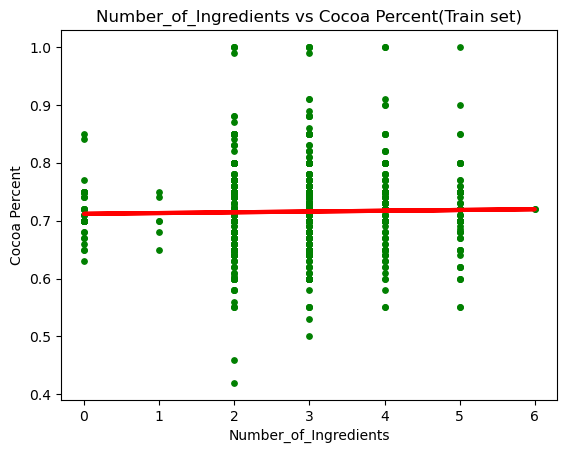

In [44]:
# scatterplot the training set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number_of_Ingredients vs Cocoa Percent(Train set)')
plot_test.xlabel('Number_of_Ingredients')
plot_test.ylabel('Cocoa Percent')
plot_test.show()

In [45]:
regression_data_df3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted,Discrepancy
0,0.700,0.718288,0.018288
1,0.700,0.714300,0.014300
2,0.700,0.715629,0.015629
3,0.700,0.715629,0.015629
4,0.700,0.714300,0.014300
5,0.740,0.715629,0.024371
6,0.730,0.715629,0.014371
7,0.720,0.715629,0.004371
8,0.725,0.714300,0.010700
9,0.720,0.716959,0.003041


This analysis can be interpreted in a few ways.  First the predictions that are there look closer to the actual values
than expected. Similar to part one, one can see that there might be the bias for any type of analysis.   Similar to before, the rating that the chocolate bar receives(it's amount of deliciousness) is dependent upon the high ratings that it receives which depend alot on the number of ingredients. The charts show a lot that the more that ingredients go into the bar, the more the 
percentage of cocoa goes down. 


In [46]:
choc_bar_ratings_df_clean5.to_csv(os.path.join(r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\choc_bar_ratings_df_clean6.csv'), index=False)